<a href="https://colab.research.google.com/github/dTenebrae/neural_networks/blob/hw2/hw2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Домашнее задание**  

Используем набор примеров fashion-MNIST

1.  Опишите - какой результата получен в нейросети в зависимости от:
  -  числа нейронов в слое(для 2-х слойной сети), 
  - числа слоев (2, 3, 5, 10) при близких размерах сети (близкое число тренируемых параметров).
  - фиксируйте для тренировочного и тестового набора метрики accuracy.
2.  Проверьте работу разных оптимизаторов (SGD, Adam, RMSProp) для одной из моделей п.1.Фиксируйте для тренировочного и тестового набора метрики accuracy.

3. Сделайте вывод - что помогло вам улучшить качество классификации в нейросети на тестовом наборе? 

4. Для одного варианта сетей сформируйте матрицу ошибок по классам. Оцените качество модели по каждому классу отдельно (полнота , точность). Сделайте вывод.



In [29]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors

import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import tensorflow.keras as keras
from tensorflow.keras.utils import normalize, to_categorical
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.backend import count_params

from sklearn.metrics import classification_report

import warnings
warnings.simplefilter("ignore")
%matplotlib inline

In [31]:
def get_classification_report(y_train_true, y_train_pred, y_test_true, y_test_pred, model, X_test, digits=3):
    print('TRAIN\n\n' + classification_report(y_train_true, y_train_pred, digits=digits))
    print('TEST\n\n' + classification_report(y_test_true, y_test_pred, digits=digits))
    print('CONFUSION MATRIX\n')
    print(pd.crosstab(y_test_true, y_test_pred))

In [2]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [2]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

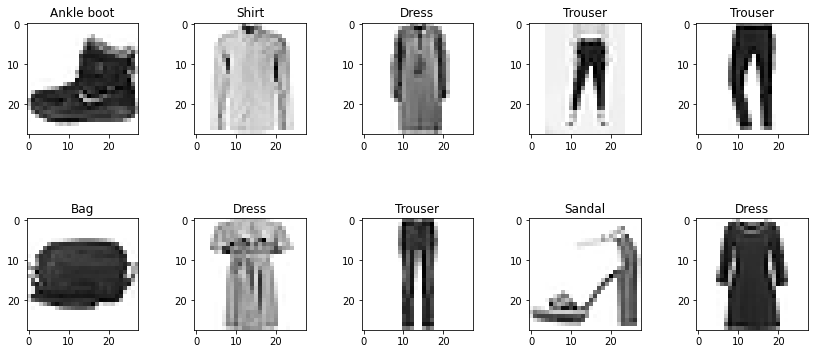

In [4]:
# sample visualization
fig, axs = plt.subplots(2,5, figsize=(14, 6), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.5)

axs = axs.ravel()

for i in range(10):
    img_id = i * np.random.randint(1000)
    axs[i].imshow(train_images[img_id], cmap='gray_r')
    axs[i].set_title(class_names[train_labels[img_id]])

In [5]:
train_images = normalize(train_images)
test_images = normalize(test_images)

In [6]:
neuron_list = np.arange(10, 211, 20)
iterations = 10
hist_list = []
acc_list_test = []
for neuron_number in neuron_list:
    model = keras.Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(neuron_number, activation='relu'),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])
    fit_hist = model.fit(train_images, train_labels, epochs=iterations, verbose=False, validation_split=0.2)
    hist_list.append(fit_hist)
    acc_list_test.append(model.evaluate(test_images, test_labels, verbose = 0)[1])
    print(f"val accuracy for {neuron_number} neurons: {fit_hist.history['val_accuracy'][-1]}")

val accuracy for 10 neurons: 0.8525833487510681
val accuracy for 30 neurons: 0.878083348274231
val accuracy for 50 neurons: 0.874750018119812
val accuracy for 70 neurons: 0.8834999799728394
val accuracy for 90 neurons: 0.8840000033378601
val accuracy for 110 neurons: 0.8865833282470703
val accuracy for 130 neurons: 0.8852499723434448
val accuracy for 150 neurons: 0.8892499804496765
val accuracy for 170 neurons: 0.8866666555404663
val accuracy for 190 neurons: 0.8879166841506958
val accuracy for 210 neurons: 0.8896666765213013


In [7]:
# создадим цвета для отрисоки
colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)
by_hsv = sorted((tuple(mcolors.rgb_to_hsv(mcolors.to_rgba(color)[:3])), name)
                for name, color in colors.items())
sorted_names = [name for hsv, name in by_hsv]

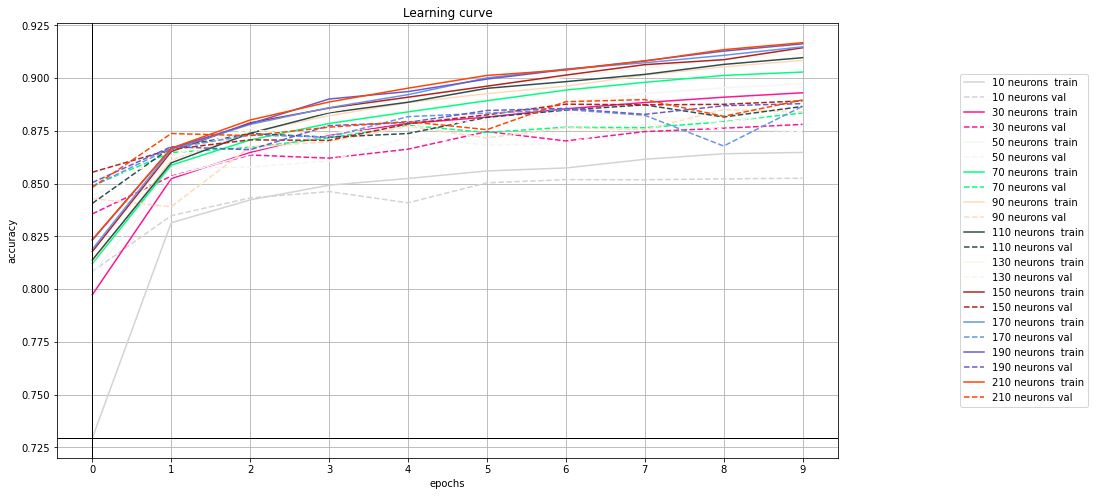

In [8]:
random.shuffle(sorted_names)
plt.figure(figsize=(14, 8))
for i, hist in enumerate(hist_list):
    clr = sorted_names.pop()
    plt.plot(hist.history['accuracy'], color=clr, label=f"{neuron_list[i]} neurons  train")
    plt.plot(hist.history['val_accuracy'], color=clr, linestyle='dashed', label=f"{neuron_list[i]} neurons val")
    plt.grid()
    plt.legend(loc='center left', bbox_to_anchor=(1.15, 0.5), ncol=1)
plt.title("Learning curve")
plt.xticks(np.arange(0, iterations))
plt.ylabel("accuracy")
plt.xlabel("epochs")
plt.axvline(color='black', lw=1)
plt.axhline(y=hist_list[0].history['accuracy'][0], color='black', lw=1)
plt.show()

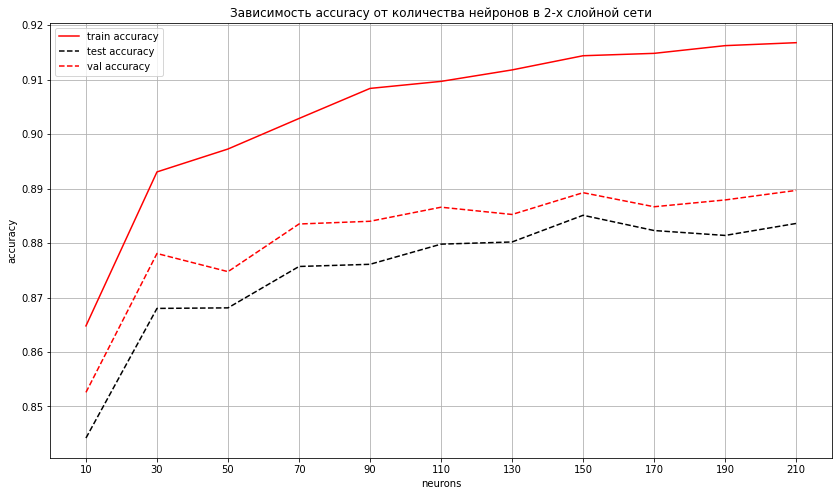

In [9]:
acc_list = [(neuron_list[i], hist.history['accuracy'][-1]) for i, hist in enumerate(hist_list)]
val_acc_list = [(neuron_list[i], hist.history['val_accuracy'][-1]) for i, hist in enumerate(hist_list)]
unzipped_acc = list(zip(*acc_list))
unzipped_val_acc = list(zip(*val_acc_list))

plt.figure(figsize=(14, 8))
plt.plot(unzipped_acc[0], unzipped_acc[1], color='red', label='train accuracy')
plt.plot(unzipped_acc[0], acc_list_test, color='black', ls='dashed', label='test accuracy')
plt.plot(unzipped_val_acc[0], unzipped_val_acc[1], color='red', ls='dashed', label='val accuracy')
plt.title("Зависимость accuracy от количества нейронов в 2-х слойной сети")
plt.grid()
plt.legend(loc='best')
plt.xlabel("neurons")
plt.ylabel("accuracy")
plt.xticks(np.arange(10, 211, 20))
plt.show()

**По результатам эксперимента можно сделать вывод что присутствует прямая зависимость от количества нейронов в скрытом слое и результирующей метрики.**

___

**Попробуем создать несколько моделей с разным количеством слоев но примерно одинаковыми настраиваемыми параметрами**

In [11]:
layers_list = [2, 3, 5, 10]
for layer_num in layers_list:
    model1 = keras.Sequential(name='deeper_model')
    model1.add(Flatten(input_shape=(28, 28)),)  
    for _ in range(layer_num):
        model1.add(Dense(np.round(90 - layer_num * 3.2), activation='relu')) 

    model1.add(Dense(10, activation='softmax'))
    approx_trainable_params = np.sum([count_params(w) for w in model1.trainable_weights])
    print(f"{layer_num} layers have {approx_trainable_params} trainable params") 

2 layers have 73930 trainable params
3 layers have 76570 trainable params
5 layers have 81040 trainable params
10 layers have 76918 trainable params


In [12]:
iterations = 20
hist_list_l = []
acc_list_test_l = []
layers_list = [2, 3, 5, 10]
for layer_num in layers_list:
    model1 = keras.Sequential(name='deeper_model')
    model1.add(Flatten(input_shape=(28, 28)),)  
    for _ in range(layer_num):
        model1.add(Dense(np.round(90 - layer_num * 3.2), activation='relu')) 
    model1.add(Dense(10, activation='softmax'))
    model1.compile(optimizer='adam',
            loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
            metrics=['accuracy'])
    fit_hist = model1.fit(train_images, train_labels, epochs=iterations, verbose=False, validation_split=0.2)
    hist_list_l.append(fit_hist)
    acc_list_test_l.append(model1.evaluate(test_images, test_labels, verbose = 0)[1])
    print(f"val accuracy for {layer_num} hidden layers: {fit_hist.history['val_accuracy'][-1]}")

val accuracy for 2 hidden layers: 0.8879166841506958
val accuracy for 3 hidden layers: 0.8853333592414856
val accuracy for 5 hidden layers: 0.8815833330154419
val accuracy for 10 hidden layers: 0.8826666474342346


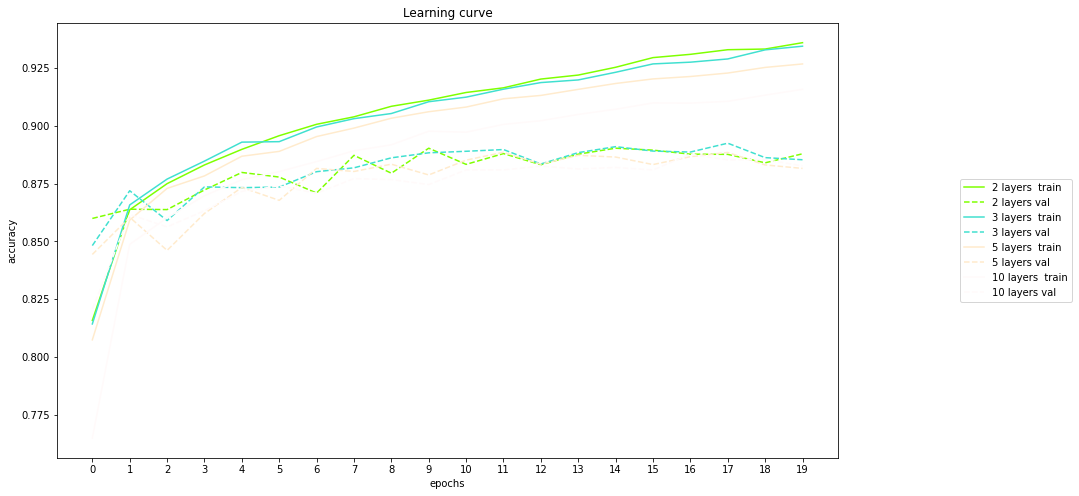

In [13]:
plt.figure(figsize=(14, 8))
for i, hist in enumerate(hist_list_l):
    clr = sorted_names.pop()
    plt.plot(hist.history['accuracy'], color=clr, label=f"{layers_list[i]} layers  train")
    plt.plot(hist.history['val_accuracy'], color=clr, linestyle='dashed', label=f"{layers_list[i]} layers val")
    plt.legend(loc='center left', bbox_to_anchor=(1.15, 0.5), ncol=1)
plt.title("Learning curve")
plt.xticks(np.arange(0, iterations))
plt.ylabel("accuracy")
plt.xlabel("epochs")
plt.show()

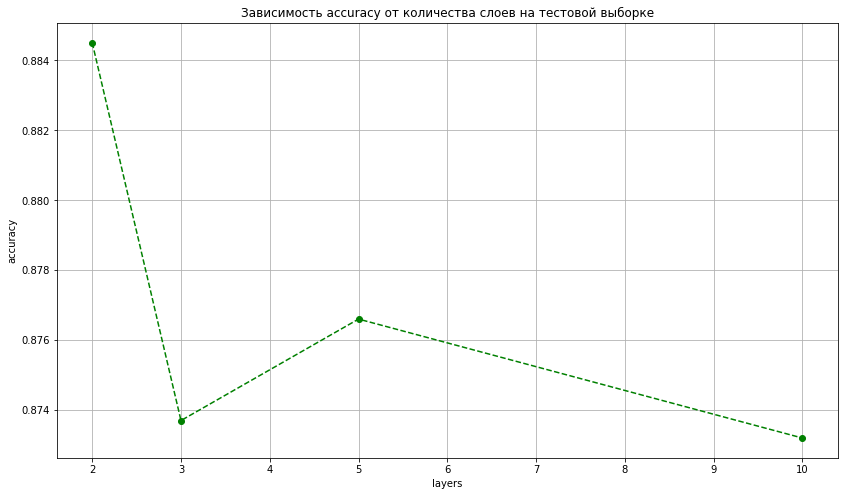

In [14]:
plt.figure(figsize=(14, 8))
plt.plot(layers_list, acc_list_test_l, ls='dashed', color='green', marker='o')
plt.grid()
plt.title("Зависимость accuracy от количества слоев на тестовой выборке")
plt.xlabel("layers")
plt.ylabel("accuracy")
plt.show()

**Можно сделать вывод, что при сохнарении количества настраиваемых параметром точность модели не улучшается с увеличением количества слоев**

___

###Сравним работу оптимизаторов###

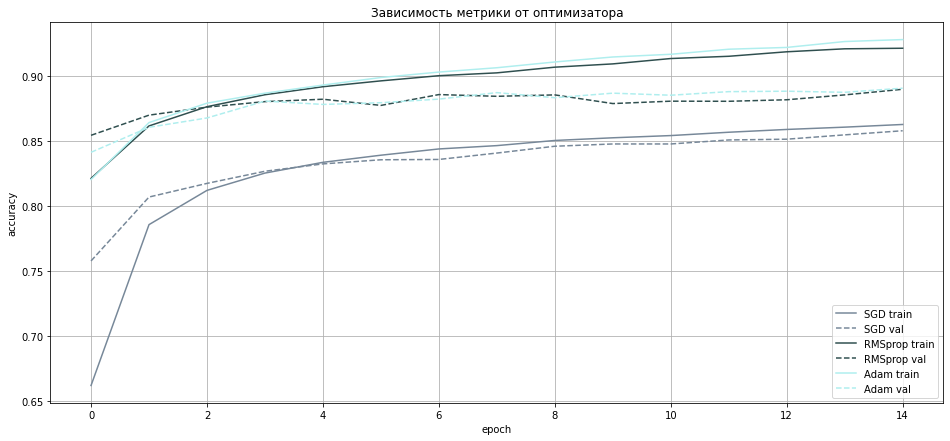

In [15]:
# создаем модель model
model = keras.Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(150, activation='relu'),
    Dense(10, activation='softmax')
])
# сохраняем ее веса (это начальная точка) model.save_weights('model.h5')
model.save_weights('model.h5')

plt.figure(figsize=(16,7))

# число рабочих эпох
epochs = 15
# вектор для выводв результатов
epoch = np.arange(epochs + 1)

# будем изменять оптимизаторы

for i_optim in ['SGD','RMSProp','adam']:
  # создаем рабочую модель modeli куда будем загружать эти вес (она должна быть идентичной структуры)
    modeli = keras.Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(150, activation='relu'),
        Dense(10, activation='softmax')
    ])
    # загружаем веса modeli.load_weights('model.h5')
    modeli.load_weights('model.h5')
    # компилируем modeli с одним из оптимизаторов
    modeli.compile(
        optimizer=i_optim,
        loss='categorical_crossentropy',
        metrics=['accuracy'],
        )
    # проводим обучение модели 
    hh = modeli.fit(
                    train_images,
                    to_categorical(train_labels),
                    epochs=epochs,
                    batch_size=32, validation_split=0.2, 
                    verbose = 0
                    )
    # картинки
    clr = sorted_names.pop()
    plt.plot(hh.history['accuracy'], color=clr, label=modeli.optimizer.get_config()['name']+' train')
    plt.plot(hh.history['val_accuracy'], color=clr, linestyle='dashed', label=modeli.optimizer.get_config()['name']+' val')
plt.legend()
plt.grid('On')

plt.title('Зависимость метрики от оптимизатора')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()


**В нашем случае сравнимые результаты показывают оптимизаторы Adam  и RMSProp**

___

**Посмотрим на Confusion matrix**

In [16]:
model = keras.Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(80, activation='relu'),
    Dense(80, activation='relu'),
    Dense(10, activation='softmax')
])
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
    )
model.fit(train_images, train_labels, epochs=20, verbose="auto", validation_split=0.2)

Epoch 1/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5143 - accuracy: 0.8156 - val_loss: 0.3907 - val_accuracy: 0.8590
Epoch 2/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3701 - accuracy: 0.8641 - val_loss: 0.3566 - val_accuracy: 0.8720
Epoch 3/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3325 - accuracy: 0.8769 - val_loss: 0.3444 - val_accuracy: 0.8725
Epoch 4/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3090 - accuracy: 0.8843 - val_loss: 0.3527 - val_accuracy: 0.8714
Epoch 5/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2922 - accuracy: 0.8920 - val_loss: 0.3545 - val_accuracy: 0.8718
Epoch 6/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2783 - accuracy: 0.8952 - val_loss: 0.3252 - val_accuracy: 0.8823
Epoch 7/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2655 - accuracy: 0.9008 - val_loss: 0.3172 - val_accuracy:

In [33]:
y_pred_train = np.argmax(model.predict(train_images), axis=1)
y_pred_test = np.argmax(model.predict(test_images), axis=1)

In [34]:
get_classification_report(train_labels, y_pred_train, test_labels, y_pred_test, model, train_images)

TRAIN

              precision    recall  f1-score   support

           0      0.882     0.912     0.897      6000
           1      0.981     0.994     0.987      6000
           2      0.783     0.926     0.848      6000
           3      0.951     0.925     0.938      6000
           4      0.872     0.833     0.852      6000
           5      0.961     0.994     0.977      6000
           6      0.877     0.741     0.803      6000
           7      0.976     0.956     0.966      6000
           8      0.991     0.991     0.991      6000
           9      0.989     0.972     0.980      6000

    accuracy                          0.924     60000
   macro avg      0.926     0.924     0.924     60000
weighted avg      0.926     0.924     0.924     60000

TEST

              precision    recall  f1-score   support

           0      0.823     0.857     0.840      1000
           1      0.966     0.980     0.973      1000
           2      0.703     0.878     0.781      1000
           

Видим, что несмотря на общий скор модели, на разных классах она отрабатывает по разному. Например, класс 6 (shirt) - имеет низкий recall, тогда как у 2го класса (pullover) проблемы с precision

## Итого

- Нейронные сети сильно зависят от числа настраиваемых параметров. Увеличение количества слоев без увеличения числа настраиваемых параметров особой пользы не дает
- Количество нейронов в слое прямопропорционально влияет на точность модели, но после определенного количества наступает насыщение
- оптимизатор играет важную роль в обучении модели
- в проблеме мультиклассовой классификации даже модель с хорошим скором дает не одинаковый результат по разным классам